2.4638570312500003


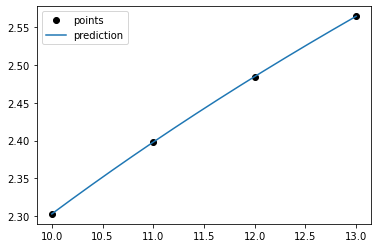

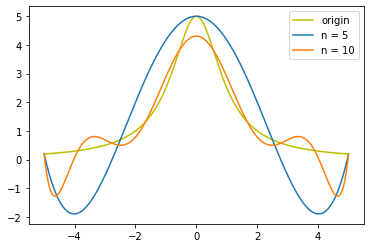

In [6]:
#coding=utf-8

'''
由给定的关于变量x与y对应的一组数据，且插值节点两两互异，数据以两个列表x_list与y_list
的形式提供，编写函数实现Lagrange插值法（不应调用python三方库中已实现的多项式插值计算
函数），求插值多项式在插值点x的值。
'''
import numpy as np
import matplotlib.pyplot as plt

#编写下述Lagrange插值函数

def Lagrange_poly(x_list,y_list,x):
    
#任务一：请在此处添加代码完成该函数，实现Lagrange插值计算功能

######Begin_1######
    y=float(0)
    for k in range(len(y_list)):
        tmp = float(y_list[k])
        for j in range(len(x_list)):
            if j!=k:
                tmp = tmp * (x-x_list[j]) / (x_list[k]-x_list[j])
        y = y + tmp
    
    return y

######End_1######

#任务二：依据下述数据表，调用Lagrange_poly函数，利用插值多项式计算x=11.75的近似值，
#并打印输出，另画图显示插值多项式曲线与各插值节点
'''
x   10       11       12       13
y   2.3026   2.3979   2.4849   2.5649

'''
######Begin_2######
x_list = [10, 11, 12, 13]
y_list = [2.3026, 2.3979, 2.4849, 2.5649]
x = 11.75
L = Lagrange_poly(x_list,y_list,x)
print(L)
x_plt = np.array(x_list) #插值结点
y_plt = np.array(y_list)
points, = plt.plot(x_plt,y_plt,"ko")


x_pred = np.linspace(10, 13, 1000)
y_pred = Lagrange_poly(x_list,y_list,x_pred)

l1, = plt.plot(x_pred,y_pred,label='prediction')
plt.legend(handles=[points,l1,],labels=['points','prediction'], loc='best')
plt.show()


######End_2######

#任务三：对于被插值函数f(x)=5/(1+x^2),取不同的节点数n=5,10，在区间[-5,5]取n等分节点作为
#插值节点，将f(x)与插值多项式曲线画在同一张图上直观比较，分析Runge现象。
######Begin_3######
def f(x):
    return 5.0/(1.0+x**2)

x_f = np.arange(-5, 5, 0.001)
y_f = f(x_f)
l_f, = plt.plot(x_f,y_f,'y',label="origin")
# 5等分
x_5d = np.linspace(-5, 5, 5)
y_5d = Lagrange_poly(x_5d,f(x_5d),x_f)
l_5d, = plt.plot(x_f,y_5d,label="n = 5")

# 10等分
x_10d = np.linspace(-5, 5, 10)
y_10d = Lagrange_poly(x_10d,f(x_10d),x_f)
l_10d, = plt.plot(x_f,y_10d,label="n = 10")

plt.legend(handles=[l_f,l_5d,l_10d,],labels=['origin','n = 5',"n = 10"], loc='best')
plt.show()

######End_3######
'''
从n=5到n=10可以明显看到，随差值节点增多，插值函数与被插值函数虽然在越来越多的点上有相同取值，但在插值节点之间，
两者却相差甚远。
'''


